# Primary Productivity in Coastal Waters
### Madhan Jeganathan, <br>June 3, 2023

## Data Description

Chlorophyll A is often used as a proxy for primary productivity in marine ecosystems. Primary producers are important because they are at the base of the food web. Nitrogen and phosphorus are key nutrients that stimulate primary production. The levels of chlorophyll A, phosphorus, and nitrogen in water are important for assessing water quality, understanding ecosystem health, and managing environmental impacts. High concentrations of chlorophyll A, phosphorus, and nitrogen can indicate excessive nutrients in the water, which can disrupt aquatic ecosystems. Therefore, it is important to have accurate data on the subject and monitor that data to make informed decisions.

The data for this analysis comes from the EPA’s National Aquatic Resource Surveys, and in particular, the National Coastal Condition Assessment (NCCA). The first dataset contains information about each site, including its name, region, state, province, coordinates, and more. The second dataset contains information about each observation of chemicals measured, including the site ID, the date, the type of chemical, the amount of that chemical, and more. After merging and transforming the two datasets, the variables I kept for my analysis were `UID` (unique ID), `WTBDY_NM` (waterbody name), `STATE` (state), `NCA_REGION` (National Coastal Assessment region), `DATE_COL_x` (date collected), `Chlorophyll A` (amount of chlorophyll A in the water, measured in $\mu g/L$), `Total Nitrogen` (amount of nitrogen in the water, measured in $mg/L$), and `Total Phosphorus` (amount of phosphorus in the water, measured in $mg/L$). This data set has 8 variables, mentioned above, and 1092 observations. Each row in the data set corresponds to one observation in which the chlorophyll A, nitrogen, and phosphorous levels of a body of water were measured at some given time. For reference, below is a small portion of the merged data.

In [5]:
ncca.head()

,UID,WTBDY_NM,STATE,NCA_REGION,DATE_COL_x,Chlorophyll A,Total Nitrogen,Total Phosphorus
0,59,Mission Bay,CA,West Coast,1-Jul-10,3.34,0.40750,0.061254
1,60,San Diego Bay,CA,West Coast,1-Jul-10,2.45,0.23000,0.037379
2,61,Mission Bay,CA,West Coast,1-Jul-10,3.82,0.33625,0.048100
3,62,San Diego Bay,CA,West Coast,1-Jul-10,6.13,0.23875,0.044251
4,63,White Oak River,NC,East Coast,9-Jun-10,9.79,0.63250,0.090636


## Exploratory Analysis

#### Nutrient Availability vs. Productivity  
There is a positive correlation between availability and productivity. Additionally, nitrogen and phosphorus are also positively correlated. We can see these relationships clearly in the plots below. In the first plot, orange denotes phosphorus while blue denotes nitrogen, and both correlate positively with chlorophyll A. In the second plot, nitrogen correlates positively with phosphorus; high levels of one seem to indicate high levels of the other.

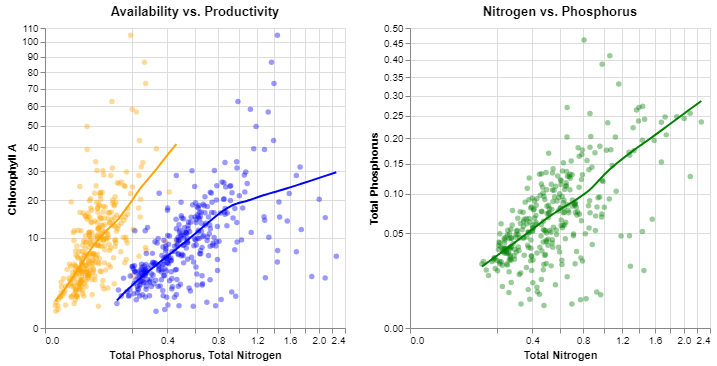

In [6]:
phosphorus_plot + nitrogen_plot | np_plot

#### Nutrient Availability by Region  
Among US coastal regions, there seem to be some notable differences in available nutrients. From the plots below, we see that in terms of nitrogen concentration, the Gulf Coast has the most, and in terms of phosphorus concentration, the Great Lakes have by far the least. In terms of total available nutrients, the Gulf Coast has by far the most, the East and West Coast are close and make up the middle of the pack, and the Great Lakes have the least.

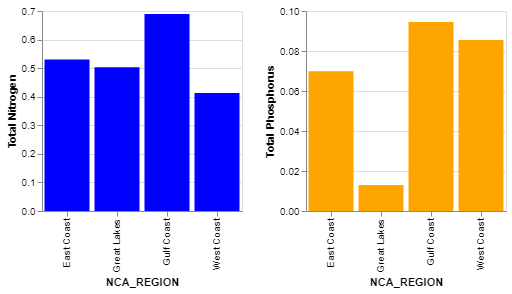

In [7]:
nregion_plot | pregion_plot

#### Productivity by Region and State  
Based on the 2010 data, productivity does seem to vary geographically. From the plots below, we see that the Gulf Coast and the East Coast have much more chlorophyll A than the West Coast and the Great Lakes. From the availability plots in the previous plots, I expected the Gulf Coast to have the most productivity and the Great Lakes to have the least, but I also expected the East and West Coast to be quite close. The large disparity in productivity between the east and west coast suggests that nitrogen might have a larger impact on productivity than phosphorus.

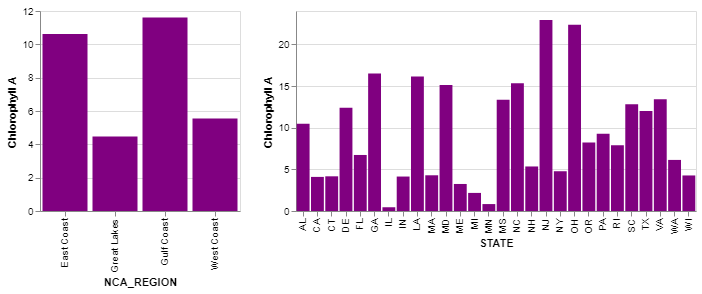

In [8]:
cregion_plot | state_plot

#### Nutrient Availability and Productivity in California, Seasonally  
Only the months of June, July, August, and September were recorded, which all fall into the season of summer. Even within these four months, though, there is a difference in availability and productivity in California coastal waters. From the plots below, we can see that in June and July, the availability is significantly lower, and in turn, the levels of chlorophyll A are lower. In August and September, however, the levels of nitrogen and phosphorus spike, and in turn, productivity increases. This makes intuitive sense because August and September are the hottest months of the year in California. We can see the gradual increase of chlorophyll A as the months get warmer and warmer.

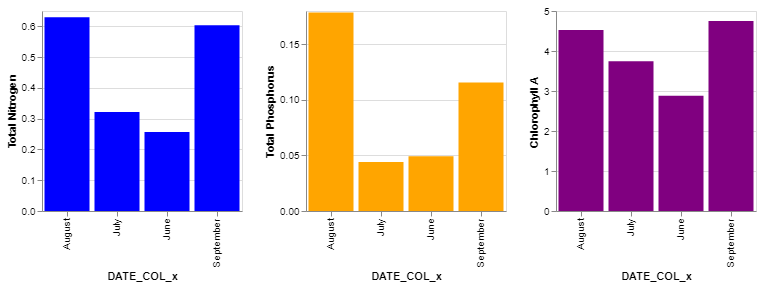

In [9]:
n_cali | p_cali | c_cali

#### Anomalies by Region  
From looking at the very first plot comparing nitrogen and phosphorus to chlorophyll A, all of the points above the 40 $\mu g/L$ line seem to be outliers. Counting all of the sites with averages of chlorophyll A over 40 $\mu g/L$ to create the plot below, we see that the east coast has by far the most at 11, and the west coast with the least at 1. This is interesting because, from previous plots, I expected the Gulf Coast to have the most anomalies since it has the highest average of both availability and productivity.

Text(0, 0.5, 'Anomaly Count')

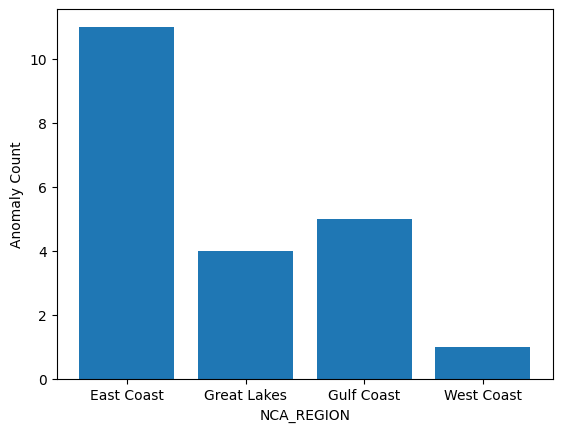

In [10]:
plt.bar(anomaly_counts.index, anomaly_counts)
plt.xlabel('NCA_REGION')
plt.ylabel('Anomaly Count')

Below is a closer look at the details of each anomaly.

In [11]:
display(anomaly)

,NCA_REGION,WTBDY_NM,STATE,Chlorophyll A,Total Nitrogen,Total Phosphorus
0,East Coast,Albermarle Sound,NC,45.3950,0.956875,0.042645
1,East Coast,Banana River,FL,49.5800,1.188000,0.047138
2,East Coast,Bohemia River,MD,104.6700,1.440000,0.196000
3,East Coast,Corrituck Sound,NC,45.2000,1.575000,0.039599
4,East Coast,Great Egg Harbor,NJ,46.2300,1.024375,0.228589
5,East Coast,Jamaica Bay,NJ,43.5300,1.185000,0.374458
6,East Coast,Little River,NC,86.2700,1.368000,0.264138
7,East Coast,Lower Ny/Nj Bay,NJ,93.1800,1.298750,0.249997
8,East Coast,Raritan Bay,NJ,73.0700,1.398000,0.270270
9,East Coast,Saint Johns River,FL,51.1400,1.308000,0.076720


There seem to be outliers even within this set of outliers. The ones that stand out the most are Lake Erie, OH, and Bohemia River, MD, with chlorophyll A concentrations of over 100 $\mu g/L$. Interestingly, the nitrogen and phosphorous contents of Bohemia River, MD, don't seem to deviate much from the other outliers. However, the nitrogen content of Lake Erie, OH, sticks out significantly, being around 3 times more than the rest of the outliers.

## Code Appendix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
ncca_raw = pd.read_csv('data/assessed_ncca2010_waterchem.csv')
ncca_sites = pd.read_csv('data/assessed_ncca2010_siteinfo.csv')

ncca = pd.merge(
    ncca_sites, ncca_raw, how = 'right',
    on = ['UID', 'STATE']
).pivot(
    index = ['UID', 'WTBDY_NM', 'STATE', 'NCA_REGION', 'DATE_COL_x'],
    columns = 'PARAMETER_NAME',
    values = 'RESULT'
).reset_index().rename_axis(
    columns=None
).loc[:, ['UID', 'WTBDY_NM','STATE', 'NCA_REGION', 'DATE_COL_x', 'Chlorophyll A', 'Total Nitrogen', 'Total Phosphorus']]

ncca.shape

(1092, 8)

In [4]:
wtbdy = ncca.drop(columns='UID').groupby(['WTBDY_NM', 'NCA_REGION']).mean(numeric_only=True).reset_index()

n_scatter = alt.Chart(wtbdy).mark_circle(opacity = 0.4, color = 'blue').encode(
    x = alt.X('Total Nitrogen:Q', scale = alt.Scale(type = 'sqrt')),
    y = alt.Y('Chlorophyll A:Q', scale = alt.Scale(type = 'sqrt')),
).properties(
    title = 'Availability vs. Productivity'
)

n_smooth = n_scatter.transform_loess(
    on = 'Total Nitrogen',
    loess = 'Chlorophyll A',
    bandwidth = 0.8
).mark_line(color = 'blue')

nitrogen_plot = n_scatter + n_smooth

p_scatter = alt.Chart(wtbdy).mark_circle(opacity = 0.4, color = 'orange').encode(
    x = alt.X('Total Phosphorus:Q', scale = alt.Scale(type = 'sqrt')),
    y = alt.Y('Chlorophyll A:Q', scale = alt.Scale(type = 'sqrt')),
).properties(
    title = 'Availability vs. Productivity'
)

p_smooth = p_scatter.transform_loess(
    on = 'Total Phosphorus',
    loess = 'Chlorophyll A',
    bandwidth = 0.8
).mark_line(color = 'orange')

phosphorus_plot = p_scatter + p_smooth

np_scatter = alt.Chart(wtbdy).mark_circle(opacity = 0.4, color = 'green').encode(
    x = alt.X('Total Nitrogen:Q', scale = alt.Scale(type = 'sqrt')),
    y = alt.Y('Total Phosphorus:Q', scale = alt.Scale(type = 'sqrt')),
).properties(
    title = 'Nitrogen vs. Phosphorus'
)

np_smooth = np_scatter.transform_loess(
    on = 'Total Nitrogen',
    loess = 'Total Phosphorus',
    bandwidth = 0.8
).mark_line(color = 'green')

np_plot = np_scatter + np_smooth

region = ncca.drop(columns='UID').groupby(['NCA_REGION']).mean(numeric_only=True).reset_index()

nregion_plot = alt.Chart(region).mark_bar(color = 'blue').encode(
    x='NCA_REGION',
    y='Total Nitrogen'
).properties(
    height = 200,
    width = 200
)
pregion_plot = alt.Chart(region).mark_bar(color = 'orange').encode(
    x='NCA_REGION',
    y='Total Phosphorus'
).properties(
    height = 200,
    width = 200
)

cregion_plot = alt.Chart(region).mark_bar(color = 'purple').encode(
    x='NCA_REGION',
    y='Chlorophyll A'
).properties(
    height = 200,
    width = 200
)

state = ncca.drop(columns='UID').groupby(['STATE']).mean(numeric_only=True).reset_index()

state_plot = alt.Chart(state).mark_bar(color = 'purple').encode(
    x='STATE',
    y='Chlorophyll A'
).properties(
    height = 200,
    width = 400
)

cali = ncca.drop(columns='UID')[ncca['STATE'] == 'CA']
cali.loc[cali['DATE_COL_x'].str.contains('Jun'), 'DATE_COL_x'] = 'June'
cali.loc[cali['DATE_COL_x'].str.contains('Jul'), 'DATE_COL_x'] = 'July'
cali.loc[cali['DATE_COL_x'].str.contains('Aug'), 'DATE_COL_x'] = 'August'
cali.loc[cali['DATE_COL_x'].str.contains('Sep'), 'DATE_COL_x'] = 'September'

cali = cali.groupby('DATE_COL_x').mean(numeric_only = True).reset_index()

n_cali = alt.Chart(cali).mark_bar(color = 'blue').encode(
    x='DATE_COL_x',
    y='Total Nitrogen'
).properties(
    height = 200,
    width = 200
)

p_cali = alt.Chart(cali).mark_bar(color = 'orange').encode(
    x='DATE_COL_x',
    y='Total Phosphorus'
).properties(
    height = 200,
    width = 200
)

c_cali = alt.Chart(cali).mark_bar(color = 'purple').encode(
    x='DATE_COL_x',
    y='Chlorophyll A'
).properties(
    height = 200,
    width = 200
)

anomaly = ncca[ncca['Chlorophyll A']>40].drop(columns = 'UID').groupby(['NCA_REGION','WTBDY_NM','STATE']).mean(numeric_only = True).reset_index()
anomaly_counts = anomaly.groupby(['NCA_REGION'])['NCA_REGION'].count()